In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
path = 'C:\\Users\\Ufuk Altan\\Desktop\\School\\Semester1\\MarketingAnalysis\\data\\'
df = pd.read_csv(path + 'CustomerTransactions.csv')
df.head()

,ID,CustomerLastName,X1,X2,X3,X4,X5,X6,X7,X8,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,Anderson,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,Bailey,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Baker,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.100000,0.100000,0.060000,0.120000,0.040000,0.120000,0.190000,0.200000,0.100000,...,0.050000,0.120000,0.060000,0.15000,0.090000,0.060000,0.170000,0.220000,0.170000,0.040000
std,29.011492,0.301511,0.301511,0.238683,0.326599,0.196946,0.326599,0.394277,0.402015,0.301511,...,0.219043,0.326599,0.238683,0.35887,0.287623,0.238683,0.377525,0.416333,0.377525,0.196946
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
X = df.drop(['ID', 'CustomerLastName'], axis = 1)

# K-Means Clustering

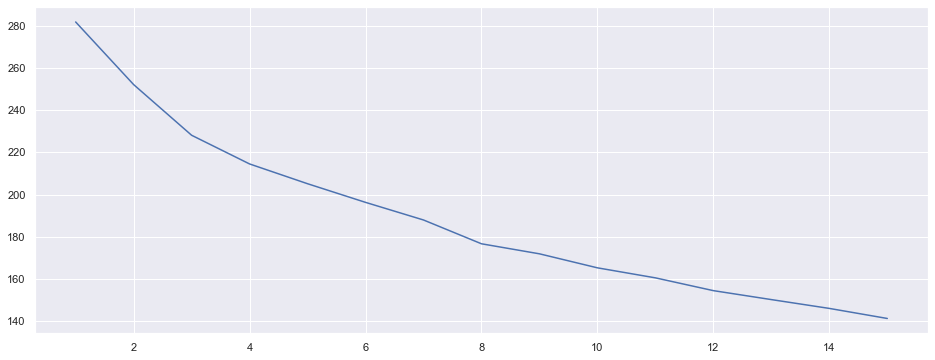

In [5]:
wcss =[]
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    
plt.figure(figsize = (16,6))
plt.plot(range(1,16), wcss)

In [6]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300, n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [7]:
y_kmeans

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [8]:
results_kmeans = pd.DataFrame({'CustomerLastName': df['CustomerLastName'], 'ClusterNumber': y_kmeans})
results_kmeans.head()

,CustomerLastName,ClusterNumber
0,Adams,1
1,Allen,0
2,Anderson,2
3,Bailey,1
4,Baker,0


# Hierarchical Clustering

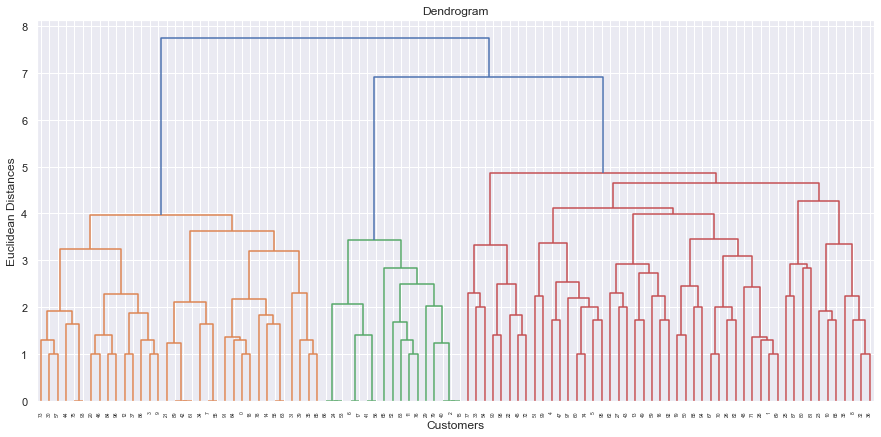

In [9]:
plt.figure(figsize = (15,7))
dendrogram = sch.dendrogram(sch.linkage(X,method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [10]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [11]:
y_hc

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
results_hc = pd.DataFrame({'CustomerLastName': df['CustomerLastName'], 'ClusterNumber': y_hc})
results_hc.head()

,CustomerLastName,ClusterNumber
0,Adams,1
1,Allen,0
2,Anderson,2
3,Bailey,1
4,Baker,0


In [13]:
y_kmeans == y_hc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [14]:
#There are in total of six different results out of 100

# Testing With K-Nearest Neighborhood

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [16]:
#Testing K-Means

In [17]:
df['KMeans'] = y_kmeans
df['HC'] = y_hc
df.drop(['ID', 'CustomerLastName'], axis = 1, inplace = True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,KMeans,HC
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [18]:
y = df['KMeans']
X = df.iloc[:, 0:32]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

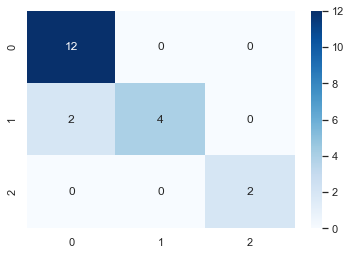

In [23]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, cmap = 'Blues' )

In [24]:
accuracy_score(y_pred, y_test)

0.9

In [25]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.95      0.89      0.91        20
weighted avg       0.91      0.90      0.89        20



In [26]:
#Testing Hierarchical

In [27]:
y = df['HC']
X = df.iloc[:, 0:32]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

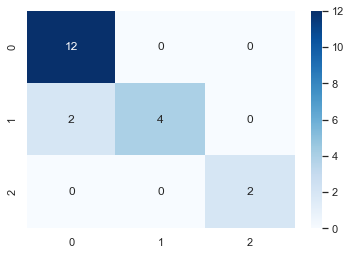

In [32]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, cmap = 'Blues' )

In [33]:
accuracy_score(y_pred, y_test)

0.9

In [34]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.95      0.89      0.91        20
weighted avg       0.91      0.90      0.89        20



In [35]:
# random_state = 0, brings .85 vs .85 accuracies
# random_state = 34, brings .7 vs .8 accuracies
# random_state = 10, brings .65 vs .7 accuracies
# random_state = 55, brings .9 vs .85 accuracies
# random_state = 365, brings .9 vs .9 accuracies

In [36]:
# Both models mostly bring similar accuracies